In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
# import data
df = pd.read_csv("spam_dataset.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df = df.drop_duplicates(keep = 'first')

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Accuracy Score: 96.32%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       903
           1       1.00      0.71      0.83       131

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



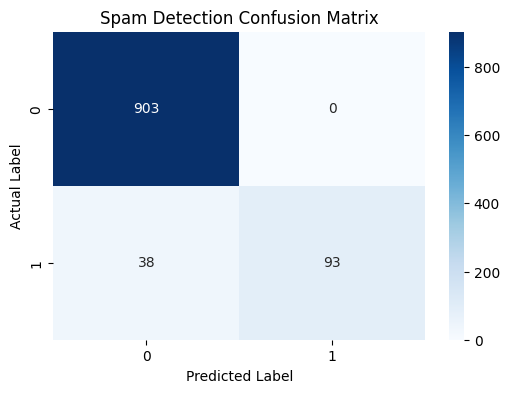

In [12]:
# text preprocessing
# lowercase & remove punctuation
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    return text.strip()

df['clean_message'] = df['message'].apply(clean_text)
df['message_len'] = df['message'].astype(str).apply(len)

# vectorization
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['clean_message'])
y = df['label'].map({'ham': 0, 'spam': 1})

# model training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# evaluation
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title('Spam Detection Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()